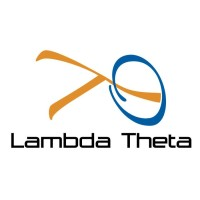

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # for building visualizations
import seaborn as sns 

In [2]:
df_train = pd.read_csv(r"C:\Users\ehtis\OneDrive\Desktop\SALES FORCAASTING\Train.csv")
df_test = pd.read_csv(r"C:\Users\ehtis\OneDrive\Desktop\SALES FORCAASTING\Test.csv")

In [3]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_train['Item_Weight'].isna().groupby(df_train['Item_Identifier']).sum()

Item_Identifier
DRA12    0
DRA24    2
DRA59    2
DRB01    1
DRB13    0
        ..
NCZ30    1
NCZ41    0
NCZ42    0
NCZ53    1
NCZ54    2
Name: Item_Weight, Length: 1559, dtype: int64

In [6]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
df_train[df_train['Item_Identifier']== 'DRA24']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1148,DRA24,19.35,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1,1146.5076
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
4130,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040
4900,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868,OUT035,2004,Small,Tier 2,Supermarket Type1,3439.5228
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208
8195,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436


In [8]:
df_train[pd.isna(df_train['Outlet_Size'])].groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   555
Supermarket Type1  Tier 2                  1855
Name: Outlet_Type, dtype: int64

In [9]:
# Get a sense of null values in the 'Outlet_Size' column using `Outlet_Type` and 'Outlet_Location_Type' test dataset
df_test[pd.isna(df_test['Outlet_Size'])].groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   370
Supermarket Type1  Tier 2                  1236
Name: Outlet_Type, dtype: int64

In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df_train.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

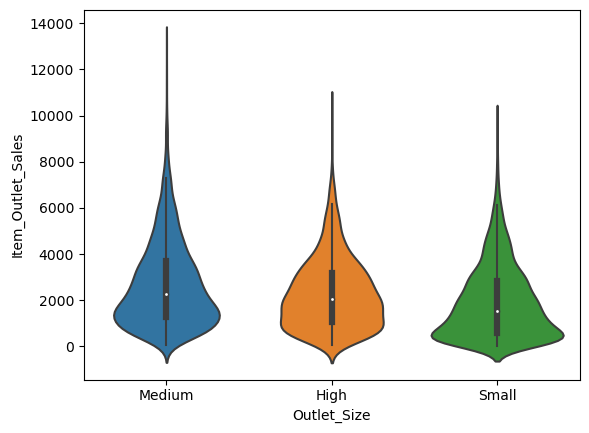

In [12]:
# Find out the level of sales for each outlet size in different locations
sns.violinplot(data = df_train, x = 'Outlet_Size', y = 'Item_Outlet_Sales',\
            col = 'Outlet_Location_Type', kind='bar', aspect=1,\
           height = 6)

plt.show()

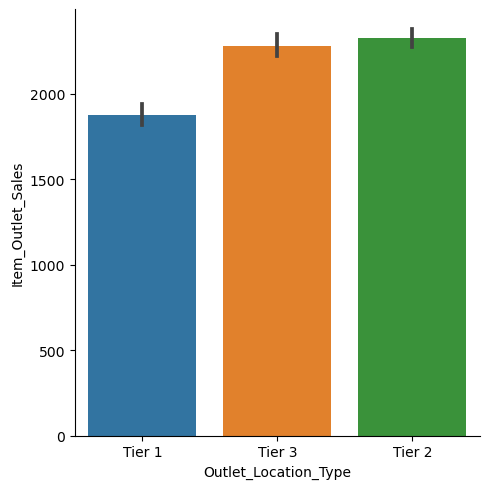

In [13]:
sns.catplot(data=df_train, x = 'Outlet_Location_Type', \
             y = 'Item_Outlet_Sales', kind = 'bar')

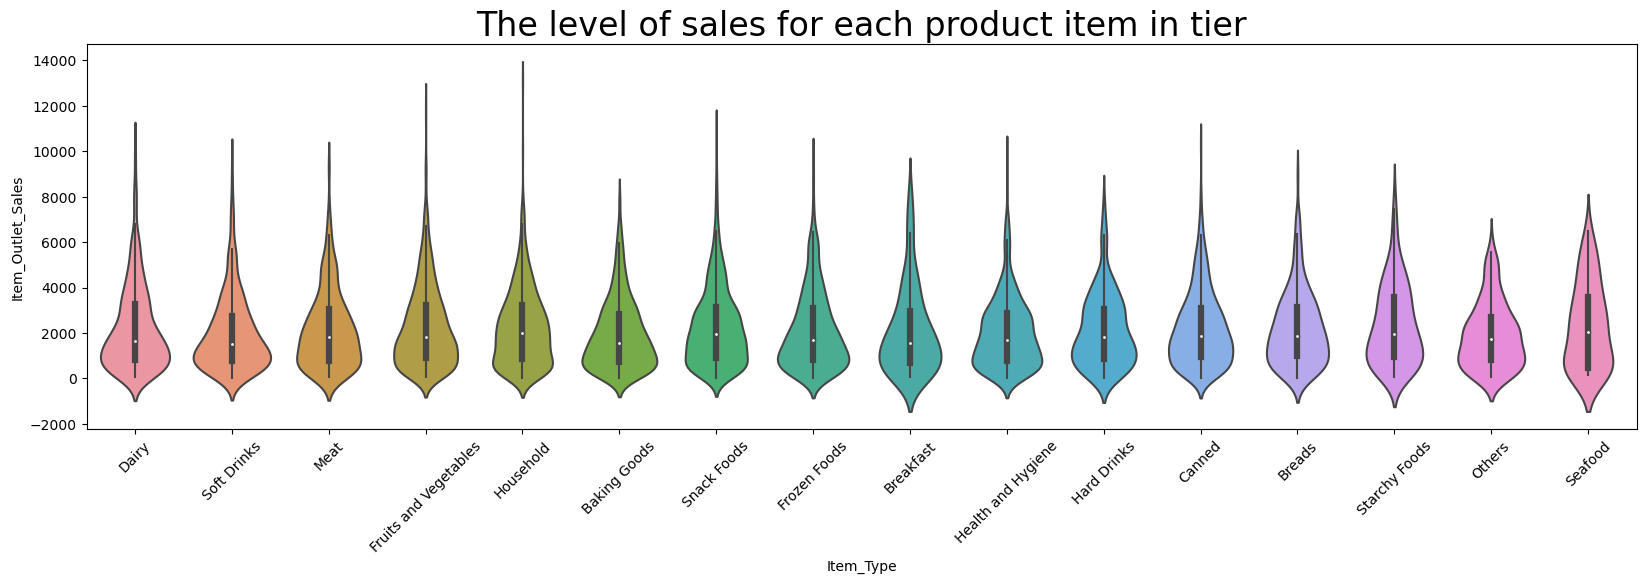

In [14]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.violinplot(data = df_train, x = 'Item_Type', y = 'Item_Outlet_Sales')

plt.title('The level of sales for each product item in tier', fontdict={'fontsize':24})
plt.show()

1.backup 

In [15]:
copy_train = df_train.copy()
copy_test = df_test.copy()

In [16]:
copy_train['Outlet_Establishment_Year'] = copy_train['Outlet_Establishment_Year'].astype('category')

copy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(7)
memory usage: 741.3+ KB


In [17]:
copy_train['Item_Fat_Content'] = copy_train['Item_Fat_Content'].apply(lambda x: 'Regular' if x.startswith('r') or x.startswith('R') else 'Low Fat')
copy_test['Item_Fat_Content'] = copy_test['Item_Fat_Content'].apply(lambda x: 'Regular' if x.startswith('r') or x.startswith('R') else 'Low Fat')

In [18]:
copy_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [19]:
copy_train['Item_Weight'] = copy_train['Item_Weight'].fillna(copy_train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

copy_test['Item_Weight'] = copy_test['Item_Weight'].fillna(copy_test.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [20]:
print(copy_train['Item_Weight'].isna().sum())
print(copy_test['Item_Weight'].isna().sum())

4
20


In [21]:
copy_train[copy_train['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [22]:
copy_test[copy_test['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
58,FDL58,NaN,Regular,0.129825,Snack Foods,263.2568,OUT019,1985,Small,Tier 1,Grocery Store
482,FDY57,NaN,Regular,0.120667,Snack Foods,94.6752,OUT027,1985,Medium,Tier 3,Supermarket Type3
882,FDH58,NaN,Low Fat,0.036761,Snack Foods,116.9834,OUT027,1985,Medium,Tier 3,Supermarket Type3
884,FDI45,NaN,Low Fat,0.037399,Fruits and Vegetables,173.1054,OUT027,1985,Medium,Tier 3,Supermarket Type3
1203,FDG50,NaN,Low Fat,0.015198,Canned,89.7146,OUT027,1985,Medium,Tier 3,Supermarket Type3
1297,FDG57,NaN,Low Fat,0.071948,Fruits and Vegetables,48.8034,OUT027,1985,Medium,Tier 3,Supermarket Type3
1300,FDJ09,NaN,Low Fat,0.058112,Snack Foods,45.5744,OUT027,1985,Medium,Tier 3,Supermarket Type3
1571,FDF22,NaN,Low Fat,0.056555,Snack Foods,214.2218,OUT027,1985,Medium,Tier 3,Supermarket Type3
1741,FDI45,NaN,Low Fat,0.065800,Fruits and Vegetables,177.0054,OUT019,1985,Small,Tier 1,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store


In [23]:
copy_train['Item_Weight'] = copy_train['Item_Weight'].fillna(copy_train.groupby('Item_Type')['Item_Weight'].transform('mean'))

copy_test['Item_Weight'] = copy_test['Item_Weight'].fillna(copy_test.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [24]:

print(copy_train['Item_Weight'].isna().sum())
print(copy_test['Item_Weight'].isna().sum())

0
0


In [25]:
copy_train['Outlet_Size'] = copy_train['Outlet_Size'].fillna('Small')
copy_test['Outlet_Size'] = copy_test['Outlet_Size'].fillna('Small')

In [26]:
mean_visibility = copy_train[copy_train['Item_Visibility'] != 0]['Item_Visibility'].mean()
copy_train['Item_Visibility'] = copy_train['Item_Visibility'].replace(0, mean_visibility)

In [27]:
mean_visibility_test = copy_test[copy_test['Item_Visibility'] != 0]['Item_Visibility'].mean()
copy_test['Item_Visibility'] = copy_test['Item_Visibility'].replace(0, mean_visibility_test)

In [28]:
import sklearn


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Item_Visibility', 'Item_MRP', 'Item_Weight']

copy_train[numerical]= scaler.fit_transform(copy_train[numerical]) 
copy_test[numerical]= scaler.fit_transform(copy_test[numerical]) 

In [30]:
copy_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.495410,0.205985,0.465635,2181.288914
std,0.276571,0.150024,0.264327,1706.499616
min,0.000000,0.000000,0.000000,33.290000
25%,0.251861,0.090853,0.265437,834.247400
50%,0.481989,0.181462,0.474209,1794.331000
75%,0.732063,0.280191,0.655156,3101.296400
max,1.000000,1.000000,1.000000,13086.964800


# 2. One hot encoding

In [31]:

labels = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type',\
          'Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size',\
          'Outlet_Location_Type','Outlet_Type']

label_encoder = pd.get_dummies(copy_train[labels])
copy_train = copy_train.drop(labels, axis = 1)
copy_train = pd.concat([copy_train, label_encoder], axis = 1)

In [32]:
copy_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.038399,0.927507,3735.1380,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.048346,0.072068,443.4228,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.040593,0.468288,2097.2700,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.205985,0.640093,732.3800,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0.260494,0.205985,0.095805,994.7052,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


3.model building

In [33]:
X = copy_train.drop('Item_Outlet_Sales', axis = 1)
y = copy_train['Item_Outlet_Sales']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_test.shape[0]))

Training set has 6818 samples.
Validation set has 1705 samples.


# 4.Linear Regression 

In [35]:
from time import time
# Import Linear Regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initiate the model
start = time()
lin_model = LinearRegression()
# Fit the model to our dataset
lin_model.fit(X_train, y_train)
y_preds = lin_model.predict(X_test)
end = time()
print(f"The duration of training is: {end-start}")
# Model accuracy
print(f"R_squared for the validation data is:{lin_model.score(X_test, y_test)}")
print(f"The mean squared error for the model is:{mean_squared_error(y_test, y_preds)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_test, y_preds)} ")


The duration of training is: 1.3443400859832764
R_squared for the validation data is:-7.079142324327256e+22
The mean squared error for the model is:2.101380959917162e+29 
The mean absolute error for the model is:18765129163574.62 


# 5. Lasso Regression

In [36]:
from time import time
# Import Lasso Regression algorithm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initiate the model
start = time()
las_model = Lasso(alpha = 1, max_iter=2000, random_state=10)
# Fit the model to our dataset
las_model.fit(X_train, y_train)
y_preds = las_model.predict(X_test)
end = time()
print(f"The duration of training is: {end-start}")
# Model accuracy
print(f"R_squared for the validation data is:{las_model.score(X_test, y_test)}")
print(f"The mean squared error for the model is:{mean_squared_error(y_test, y_preds)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_test, y_preds)} ")

The duration of training is: 1.3154242038726807
R_squared for the validation data is:0.5750005128764678
The mean squared error for the model is:1261573.491956628 
The mean absolute error for the model is:828.3615043582558 


# 5. XGB Regression

In [45]:
from xgboost import XGBRegressor

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

# Initiate the model
start = time()
xgb_model = XGBRegressor(random_state = 10)
# Fit the model to our dataset
xgb_model.fit(X_train, y_train)
k_fold = KFold(n_splits=2, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=k_fold)
y_preds = xgb_model.predict(X_test)
end = time()
print(f"The duration of training is: {end-start}")
# Model accuracy
print(f"R_squared for the validation data is:{r2_score(y_test, y_preds)}")
print(f"K-fold CV average score: {kf_cv_scores.mean()}")
print(f"The mean squared error for the model is:{mean_squared_error(y_test, y_preds)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_test, y_preds)} ")

The duration of training is: 30.876713514328003
R_squared for the validation data is:0.5778865471314476
K-fold CV average score: 0.5478714158275031
The mean squared error for the model is:1253006.5538231167 
The mean absolute error for the model is:774.3670326142486 


# 6. Feed forward neural network

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 10)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_test.shape[0]))


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
y_preds = model.predict(X_test)
print(f"R_squared for the validation data is:{r2_score(y_test, y_preds)}")
print(f"K-fold CV average score: {kf_cv_scores.mean()}")
print(f"The mean squared error for the model is:{mean_squared_error(y_test, y_preds)} ")
print(f"The mean absolute error for the model is:{mean_absolute_error(y_test, y_preds)} ")


Training set has 6818 samples.
Validation set has 1705 samples.
Epoch 1/1000
214/214 [==============================] - 1s 3ms/step - loss: 6655121.0000 - mean_absolute_error: 1965.9827 - val_loss: 4359307.5000 - val_mean_absolute_error: 1459.7749
Epoch 2/1000
214/214 [==============================] - 1s 3ms/step - loss: 2401715.0000 - mean_absolute_error: 1105.3590 - val_loss: 2822124.2500 - val_mean_absolute_error: 1162.0116
Epoch 3/1000
214/214 [==============================] - 1s 3ms/step - loss: 1815605.5000 - mean_absolute_error: 938.4692 - val_loss: 2518787.7500 - val_mean_absolute_error: 1089.5428
Epoch 4/1000
214/214 [==============================] - 1s 5ms/step - loss: 1565537.1250 - mean_absolute_error: 856.1424 - val_loss: 2371633.0000 - val_mean_absolute_error: 1051.1415
Epoch 5/1000
214/214 [==============================] - 1s 3ms/step - loss: 1414631.2500 - mean_absolute_error: 810.1659 - val_loss: 2282380.7500 - val_mean_absolute_error: 1032.8562
Epoch 6/1000
214/21

214/214 [==============================] - 0s 2ms/step - loss: 24463.0684 - mean_absolute_error: 108.6794 - val_loss: 3711528.5000 - val_mean_absolute_error: 1498.7749
Epoch 91/1000
214/214 [==============================] - 0s 2ms/step - loss: 23433.9824 - mean_absolute_error: 106.4740 - val_loss: 3841090.0000 - val_mean_absolute_error: 1529.9724
Epoch 92/1000
214/214 [==============================] - 1s 3ms/step - loss: 22722.9570 - mean_absolute_error: 104.4139 - val_loss: 3802443.5000 - val_mean_absolute_error: 1521.2053
Epoch 93/1000
214/214 [==============================] - 1s 3ms/step - loss: 22344.4922 - mean_absolute_error: 103.8884 - val_loss: 3818199.5000 - val_mean_absolute_error: 1526.6354
Epoch 94/1000
214/214 [==============================] - 1s 3ms/step - loss: 22636.9746 - mean_absolute_error: 105.7550 - val_loss: 3766430.5000 - val_mean_absolute_error: 1511.9011
Epoch 95/1000
214/214 [==============================] - 1s 3ms/step - loss: 22304.0625 - mean_absolute_

214/214 [==============================] - 1s 4ms/step - loss: 9048.2744 - mean_absolute_error: 68.8387 - val_loss: 2916139.5000 - val_mean_absolute_error: 1322.5979
Epoch 181/1000
214/214 [==============================] - 1s 5ms/step - loss: 8821.7988 - mean_absolute_error: 68.0135 - val_loss: 2891999.7500 - val_mean_absolute_error: 1316.7223
Epoch 182/1000
214/214 [==============================] - 1s 5ms/step - loss: 8662.7686 - mean_absolute_error: 67.3633 - val_loss: 2865814.7500 - val_mean_absolute_error: 1309.7645
Epoch 183/1000
214/214 [==============================] - 1s 3ms/step - loss: 8839.5859 - mean_absolute_error: 67.8713 - val_loss: 2854489.2500 - val_mean_absolute_error: 1307.5431
Epoch 184/1000
214/214 [==============================] - 0s 2ms/step - loss: 8427.4756 - mean_absolute_error: 66.5202 - val_loss: 2810568.2500 - val_mean_absolute_error: 1297.4314
Epoch 185/1000
214/214 [==============================] - 0s 2ms/step - loss: 8479.2861 - mean_absolute_error:

214/214 [==============================] - 1s 4ms/step - loss: 5222.8081 - mean_absolute_error: 51.8038 - val_loss: 2452278.0000 - val_mean_absolute_error: 1205.6930
Epoch 271/1000
214/214 [==============================] - 1s 4ms/step - loss: 5260.8330 - mean_absolute_error: 51.9739 - val_loss: 2419909.2500 - val_mean_absolute_error: 1195.6423
Epoch 272/1000
214/214 [==============================] - 1s 4ms/step - loss: 5235.7573 - mean_absolute_error: 52.0267 - val_loss: 2446214.0000 - val_mean_absolute_error: 1203.8973
Epoch 273/1000
214/214 [==============================] - 1s 4ms/step - loss: 5296.6948 - mean_absolute_error: 52.5792 - val_loss: 2470373.7500 - val_mean_absolute_error: 1209.2375
Epoch 274/1000
214/214 [==============================] - 1s 3ms/step - loss: 5253.7954 - mean_absolute_error: 52.5442 - val_loss: 2429344.2500 - val_mean_absolute_error: 1199.2706
Epoch 275/1000
214/214 [==============================] - 1s 3ms/step - loss: 5212.4707 - mean_absolute_error:

214/214 [==============================] - 1s 3ms/step - loss: 3902.5093 - mean_absolute_error: 45.1491 - val_loss: 2293821.0000 - val_mean_absolute_error: 1162.1776
Epoch 361/1000
214/214 [==============================] - 1s 3ms/step - loss: 3884.3882 - mean_absolute_error: 44.8569 - val_loss: 2275498.5000 - val_mean_absolute_error: 1157.0714
Epoch 362/1000
214/214 [==============================] - 1s 3ms/step - loss: 4016.6243 - mean_absolute_error: 45.9635 - val_loss: 2263124.5000 - val_mean_absolute_error: 1152.4281
Epoch 363/1000
214/214 [==============================] - 1s 4ms/step - loss: 3889.2981 - mean_absolute_error: 45.1500 - val_loss: 2253923.0000 - val_mean_absolute_error: 1150.1666
Epoch 364/1000
214/214 [==============================] - 1s 4ms/step - loss: 3645.6038 - mean_absolute_error: 43.7746 - val_loss: 2297974.0000 - val_mean_absolute_error: 1162.5425
Epoch 365/1000
214/214 [==============================] - 1s 3ms/step - loss: 3682.8328 - mean_absolute_error:

214/214 [==============================] - 0s 2ms/step - loss: 2903.6841 - mean_absolute_error: 39.1906 - val_loss: 2201185.5000 - val_mean_absolute_error: 1136.2684
Epoch 451/1000
214/214 [==============================] - 0s 2ms/step - loss: 2986.8135 - mean_absolute_error: 39.4223 - val_loss: 2192484.5000 - val_mean_absolute_error: 1133.7493
Epoch 452/1000
214/214 [==============================] - 1s 2ms/step - loss: 2961.4929 - mean_absolute_error: 39.4998 - val_loss: 2203795.0000 - val_mean_absolute_error: 1135.2635
Epoch 453/1000
214/214 [==============================] - 1s 2ms/step - loss: 2909.9448 - mean_absolute_error: 39.1519 - val_loss: 2191626.2500 - val_mean_absolute_error: 1133.1952
Epoch 454/1000
214/214 [==============================] - 1s 2ms/step - loss: 2868.8088 - mean_absolute_error: 38.1750 - val_loss: 2200824.7500 - val_mean_absolute_error: 1136.0309
Epoch 455/1000
214/214 [==============================] - 1s 3ms/step - loss: 2777.9492 - mean_absolute_error:

214/214 [==============================] - 1s 4ms/step - loss: 2491.1299 - mean_absolute_error: 36.0840 - val_loss: 2105086.0000 - val_mean_absolute_error: 1106.7593
Epoch 541/1000
214/214 [==============================] - 1s 4ms/step - loss: 2508.5212 - mean_absolute_error: 36.1026 - val_loss: 2087160.6250 - val_mean_absolute_error: 1100.0022
Epoch 542/1000
214/214 [==============================] - 1s 3ms/step - loss: 2498.6472 - mean_absolute_error: 36.0269 - val_loss: 2108771.5000 - val_mean_absolute_error: 1107.5480
Epoch 543/1000
214/214 [==============================] - 1s 3ms/step - loss: 2443.5227 - mean_absolute_error: 35.4058 - val_loss: 2132112.0000 - val_mean_absolute_error: 1114.8104
Epoch 544/1000
214/214 [==============================] - 1s 5ms/step - loss: 2467.1145 - mean_absolute_error: 35.3558 - val_loss: 2120436.5000 - val_mean_absolute_error: 1110.8116
Epoch 545/1000
214/214 [==============================] - 1s 3ms/step - loss: 2494.5872 - mean_absolute_error:

214/214 [==============================] - 1s 3ms/step - loss: 1808.8154 - mean_absolute_error: 30.1920 - val_loss: 2070456.8750 - val_mean_absolute_error: 1095.4025
Epoch 631/1000
214/214 [==============================] - 1s 2ms/step - loss: 1875.9872 - mean_absolute_error: 31.2199 - val_loss: 2073816.2500 - val_mean_absolute_error: 1095.2809
Epoch 632/1000
214/214 [==============================] - 1s 3ms/step - loss: 2016.4259 - mean_absolute_error: 32.7027 - val_loss: 2053271.6250 - val_mean_absolute_error: 1088.5020
Epoch 633/1000
214/214 [==============================] - 1s 3ms/step - loss: 2166.8357 - mean_absolute_error: 33.4451 - val_loss: 2068690.3750 - val_mean_absolute_error: 1093.3335
Epoch 634/1000
214/214 [==============================] - 1s 2ms/step - loss: 2377.8228 - mean_absolute_error: 35.1587 - val_loss: 2038758.1250 - val_mean_absolute_error: 1085.4274
Epoch 635/1000
214/214 [==============================] - 1s 3ms/step - loss: 2318.2383 - mean_absolute_error:

214/214 [==============================] - 1s 3ms/step - loss: 2197.5046 - mean_absolute_error: 33.8692 - val_loss: 1995504.6250 - val_mean_absolute_error: 1068.2087
Epoch 721/1000
214/214 [==============================] - 1s 4ms/step - loss: 2372.1294 - mean_absolute_error: 34.4369 - val_loss: 2052955.0000 - val_mean_absolute_error: 1087.7771
Epoch 722/1000
214/214 [==============================] - 1s 4ms/step - loss: 2122.1509 - mean_absolute_error: 33.2343 - val_loss: 2018890.7500 - val_mean_absolute_error: 1076.8571
Epoch 723/1000
214/214 [==============================] - 1s 3ms/step - loss: 1712.0956 - mean_absolute_error: 29.6702 - val_loss: 2046600.3750 - val_mean_absolute_error: 1084.9385
Epoch 724/1000
214/214 [==============================] - 1s 4ms/step - loss: 1566.8531 - mean_absolute_error: 27.9542 - val_loss: 2027963.3750 - val_mean_absolute_error: 1080.8311
Epoch 725/1000
214/214 [==============================] - 1s 4ms/step - loss: 1493.6300 - mean_absolute_error:

214/214 [==============================] - 1s 4ms/step - loss: 1662.2433 - mean_absolute_error: 29.4606 - val_loss: 2013700.2500 - val_mean_absolute_error: 1074.7538
Epoch 811/1000
214/214 [==============================] - 0s 2ms/step - loss: 1601.8871 - mean_absolute_error: 28.8945 - val_loss: 2007693.5000 - val_mean_absolute_error: 1072.5378
Epoch 812/1000
214/214 [==============================] - 0s 2ms/step - loss: 1566.0509 - mean_absolute_error: 28.7719 - val_loss: 2010905.8750 - val_mean_absolute_error: 1074.2698
Epoch 813/1000
214/214 [==============================] - 0s 2ms/step - loss: 1600.3823 - mean_absolute_error: 28.9229 - val_loss: 2001525.0000 - val_mean_absolute_error: 1070.3245
Epoch 814/1000
214/214 [==============================] - 0s 2ms/step - loss: 1566.5232 - mean_absolute_error: 28.5895 - val_loss: 1989831.7500 - val_mean_absolute_error: 1067.4906
Epoch 815/1000
214/214 [==============================] - 0s 2ms/step - loss: 1629.5435 - mean_absolute_error:

214/214 [==============================] - 1s 4ms/step - loss: 1636.1770 - mean_absolute_error: 29.3807 - val_loss: 2004170.1250 - val_mean_absolute_error: 1070.3463
Epoch 901/1000
214/214 [==============================] - 1s 4ms/step - loss: 1515.1207 - mean_absolute_error: 28.1070 - val_loss: 1991829.8750 - val_mean_absolute_error: 1067.3776
Epoch 902/1000
214/214 [==============================] - 1s 3ms/step - loss: 1596.8115 - mean_absolute_error: 28.5222 - val_loss: 1999739.0000 - val_mean_absolute_error: 1068.9800
Epoch 903/1000
214/214 [==============================] - 1s 4ms/step - loss: 1599.4696 - mean_absolute_error: 28.6786 - val_loss: 2000510.1250 - val_mean_absolute_error: 1069.8668
Epoch 904/1000
214/214 [==============================] - 1s 4ms/step - loss: 1530.0887 - mean_absolute_error: 27.9106 - val_loss: 1987448.8750 - val_mean_absolute_error: 1065.5032
Epoch 905/1000
214/214 [==============================] - 1s 3ms/step - loss: 1511.8185 - mean_absolute_error:

214/214 [==============================] - 0s 2ms/step - loss: 1411.8521 - mean_absolute_error: 27.0534 - val_loss: 1978382.1250 - val_mean_absolute_error: 1060.6758
Epoch 991/1000
214/214 [==============================] - 1s 5ms/step - loss: 1447.8470 - mean_absolute_error: 27.3078 - val_loss: 1977780.6250 - val_mean_absolute_error: 1061.4148
Epoch 992/1000
214/214 [==============================] - 1s 5ms/step - loss: 1333.8674 - mean_absolute_error: 26.3896 - val_loss: 1975072.0000 - val_mean_absolute_error: 1058.8636
Epoch 993/1000
214/214 [==============================] - 1s 4ms/step - loss: 1356.1678 - mean_absolute_error: 26.7111 - val_loss: 1974876.6250 - val_mean_absolute_error: 1060.3180
Epoch 994/1000
214/214 [==============================] - 1s 4ms/step - loss: 1300.0133 - mean_absolute_error: 26.0352 - val_loss: 1959831.5000 - val_mean_absolute_error: 1054.2170
Epoch 995/1000
214/214 [==============================] - 1s 4ms/step - loss: 1434.7738 - mean_absolute_error:

In [48]:
y_test

7186    3649.2498
2283    1845.5976
2206    2675.1844
5446     675.7870
6380    3755.1120
          ...    
2879     491.3604
6094     165.7842
1598    1225.0720
8012    3146.5708
7756    2563.3300
Name: Item_Outlet_Sales, Length: 1705, dtype: float64